##### Set Up

In [1]:
## imports and dependencies

# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# models
from sklearn.ensemble import RandomForestRegressor

# data split
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# accuracy
from sklearn.metrics import mean_absolute_error


##### Data

In [2]:
# data
df = pd.read_csv("region_dataset.csv")

In [3]:
df = df.drop(['Weekly Gross', 'Total Gross', 'Annual Gross', 'Weekly Net', 'Annual Net', 'Ln Annual Net', 'AgeSQ', 'Pos_AM', 'Pos_CB', 'Pos_CF', 'Pos_CM', 'Pos_DF', 'Pos_DM', 'Pos_FW', 'Pos_FW,DF', 'Pos_FW,MF', 'Pos_LB', 'Pos_LM', 'Pos_LW', 'Pos_MF', 'Pos_MF,DF', 'Pos_RB', 'Pos_RM',	'Pos_RW', 'Pos_SS'], axis=1)

##### Pre Processing

In [4]:
# parameters and target
x = df.drop('Ln Weekly Gross', axis=1)
y = df['Ln Weekly Gross']

In [5]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
# PCA
pca = PCA(n_components=0.9)  
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [8]:
# Random Forest Scaled
rf_scaled = RandomForestRegressor()
rf_scaled.fit(x_train_scaled, y_train)
y_pred_scaled = rf_scaled.predict(x_test_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print("Mean Absolute Error (scaled):", mae_scaled)

Mean Absolute Error (scaled): 0.3803245905907437


In [9]:
# Random Forest PCA
rf_pca = RandomForestRegressor()
rf_pca.fit(x_train_pca, y_train)
y_pred_pca = rf_pca.predict(x_test_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
print("Mean Absolute Error (PCA):", mae_pca)

Mean Absolute Error (PCA): 0.5111018930386922


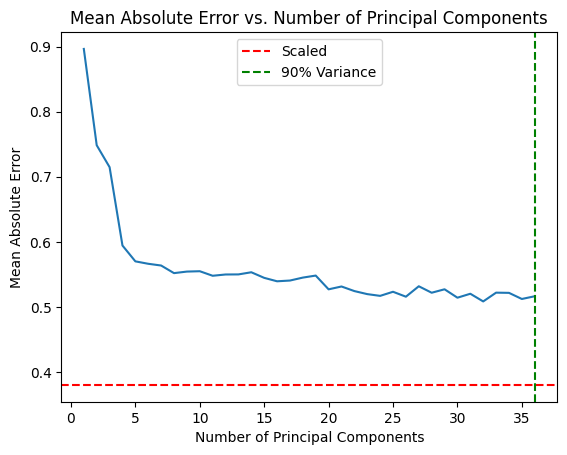

In [10]:
# iterate through numbers of principal components
num_components = range(1, pca.n_components_ + 1)
mae_values = []

for n in num_components:
    pca = PCA(n_components=n)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    rf = RandomForestRegressor()
    rf.fit(x_train_pca, y_train)
    y_pred = rf.predict(x_test_pca)

    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

# Plot the mean absolute error vs. number of principal components
plt.plot(num_components, mae_values)
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error vs. Number of Principal Components")
plt.axhline(y=mae_scaled, color='r', ls='--', label='Scaled')
plt.axvline(x=pca.n_components_, color='g', ls='--', label='90% Variance')
plt.legend()
plt.show()

In [11]:
num_components[mae_values.index(min(mae_values))], min(mae_values)

(32, 0.5085536381802752)

In [12]:
num_components

range(1, 37)

In [13]:
mae_values

[0.8963833987031505,
 0.7484490742506354,
 0.7147663399286576,
 0.5944233211155595,
 0.570111478070707,
 0.5663787969943865,
 0.5637114778662738,
 0.5520281268317873,
 0.5544060153299345,
 0.554951445844847,
 0.5479822749231547,
 0.5499332893754532,
 0.5500583896181443,
 0.553360338989937,
 0.5447727115046647,
 0.5395004710243767,
 0.5406369406479665,
 0.5451684552339737,
 0.5482704868151669,
 0.5271388496810308,
 0.531505584424139,
 0.5244587740757242,
 0.5197943737767815,
 0.5171018531482967,
 0.5233927123175174,
 0.5158349193103315,
 0.5318507562664805,
 0.5219223315136177,
 0.5272100171218549,
 0.5142950001728331,
 0.5203581618261716,
 0.5085536381802752,
 0.52203417604389,
 0.5217274583500809,
 0.5123299519929323,
 0.516512563356378]